In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\karth\Downloads\Advanced-House-Price-Prediction--master\Advanced-House-Price-Prediction--master\train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
feature_with_na=[features for features in data.columns if data[features].isnull().sum()]
feature_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for feature in feature_with_na:
    print(feature,np.round(data[feature].isnull().mean(),4),"%missing value")

LotFrontage 0.1774 %missing value
Alley 0.9377 %missing value
MasVnrType 0.0055 %missing value
MasVnrArea 0.0055 %missing value
BsmtQual 0.0253 %missing value
BsmtCond 0.0253 %missing value
BsmtExposure 0.026 %missing value
BsmtFinType1 0.0253 %missing value
BsmtFinType2 0.026 %missing value
Electrical 0.0007 %missing value
FireplaceQu 0.4726 %missing value
GarageType 0.0555 %missing value
GarageYrBlt 0.0555 %missing value
GarageFinish 0.0555 %missing value
GarageQual 0.0555 %missing value
GarageCond 0.0555 %missing value
PoolQC 0.9952 %missing value
Fence 0.8075 %missing value
MiscFeature 0.963 %missing value


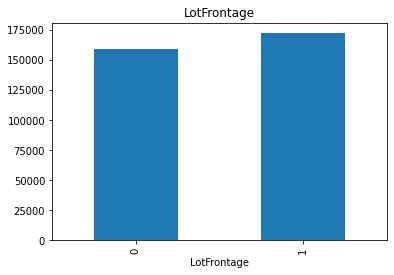

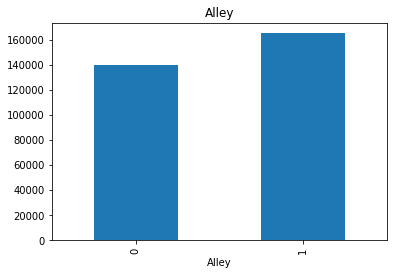

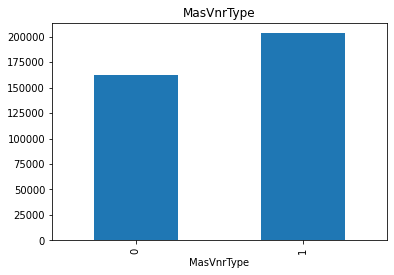

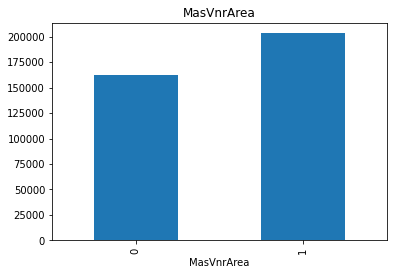

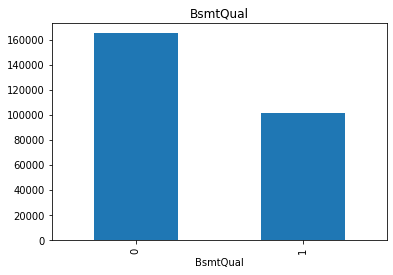

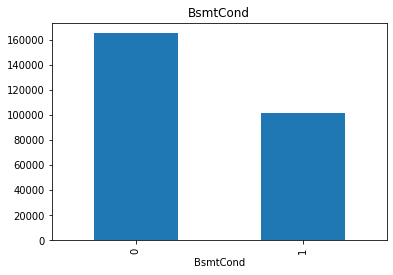

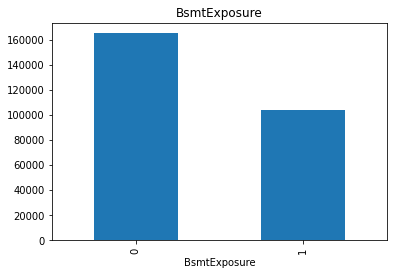

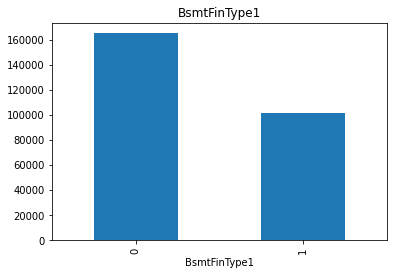

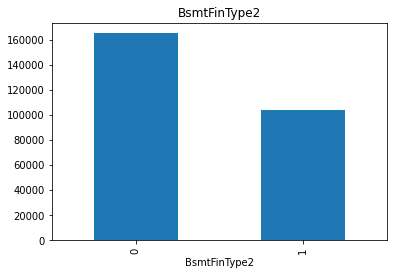

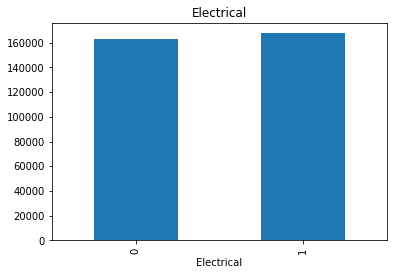

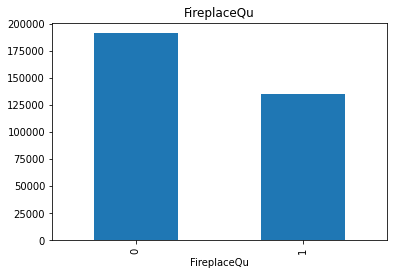

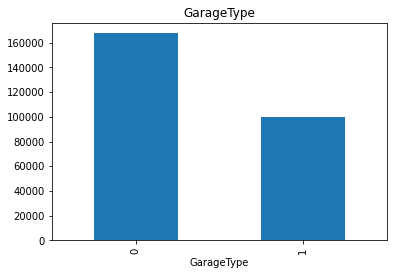

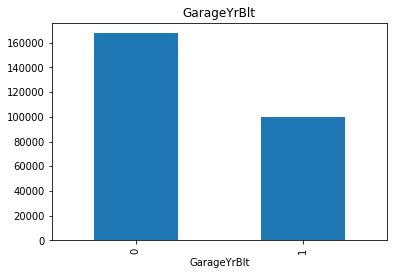

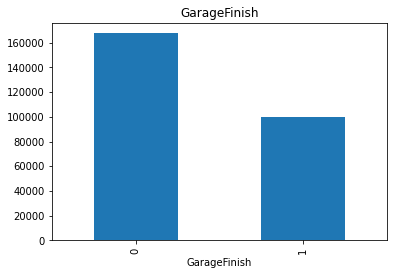

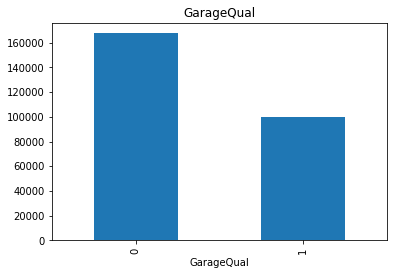

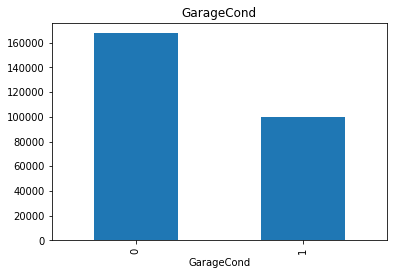

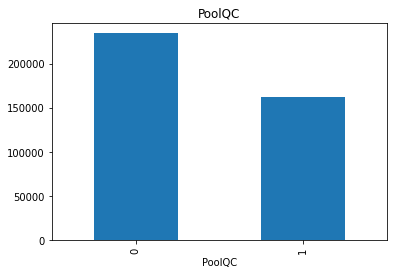

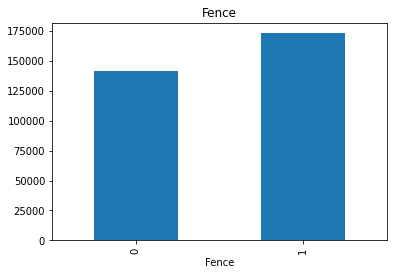

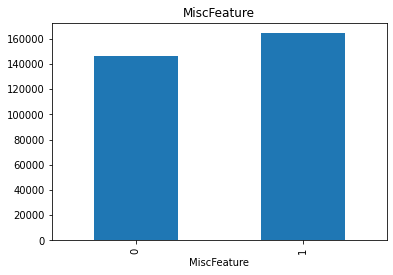

In [8]:
for feature in feature_with_na:
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
     # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

### Numerical Variable

In [9]:
Numerical_variable=[feature for feature in data.columns if data[feature].dtypes!="object"]

In [10]:
print("Numerical_variable",len(Numerical_variable))

Numerical_variable 54


In [11]:
data[Numerical_variable].head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,...,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,0,...,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,...,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,0,...,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,...,0,0,0,1,1,1,0,12,2008,250000


Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering 

In [12]:
# list of variables that contain year information

year_feature=[feature for feature in Numerical_variable if "Yr" in feature or "Year" in feature]

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
for feature in year_feature:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [0 1]
YrSold [2008 2007 2006 2009 2010]


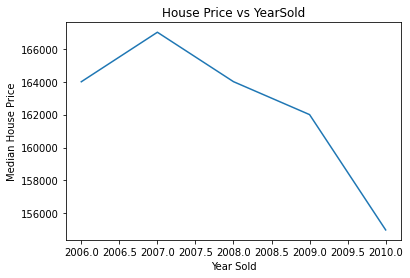

In [15]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()

In [16]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

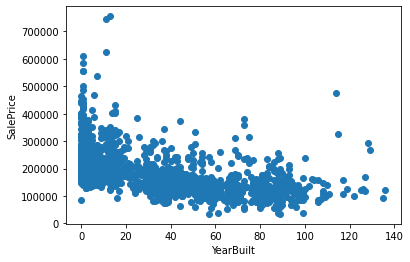

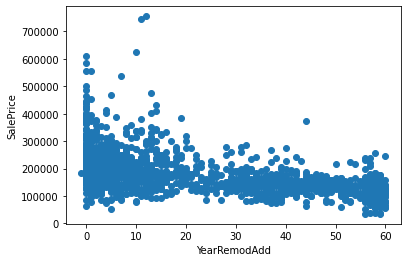

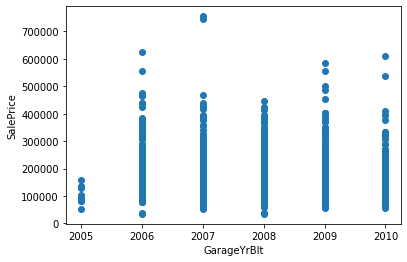

In [17]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [18]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables


discrete_feature=[feature for feature in Numerical_variable if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 35


In [19]:
discrete_feature

['MSSubClass',
 'LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [20]:
data[discrete_feature]

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,GarageCars,GarageQual,GarageCond,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold
0,60,0,1,7,5,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,2
1,20,0,1,6,8,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,5
2,60,0,1,7,5,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,9
3,70,0,1,7,5,0,0,0,0,0,...,3,0,0,0,0,1,1,1,0,2
4,60,0,1,8,5,0,0,0,0,0,...,3,0,0,0,0,1,1,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,1,6,5,0,0,0,0,0,...,2,0,0,0,0,1,1,1,0,8
1456,20,0,1,6,6,0,0,0,0,0,...,2,0,0,0,0,1,0,1,0,2
1457,70,0,1,7,9,0,0,0,0,0,...,1,0,0,0,0,1,0,0,2500,5
1458,20,0,1,5,6,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,4


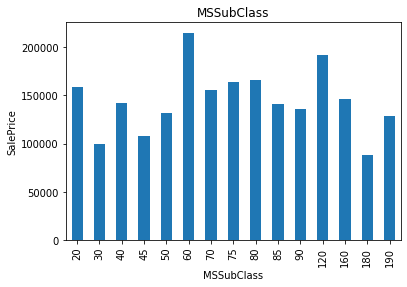

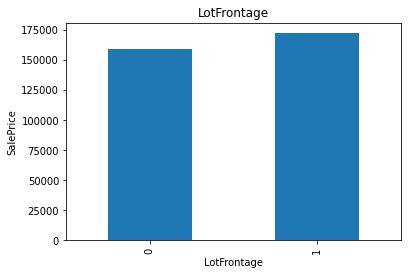

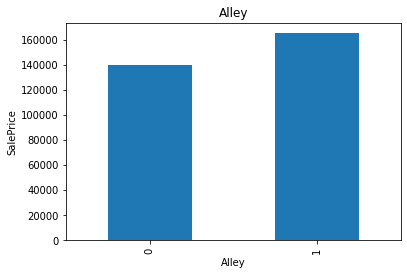

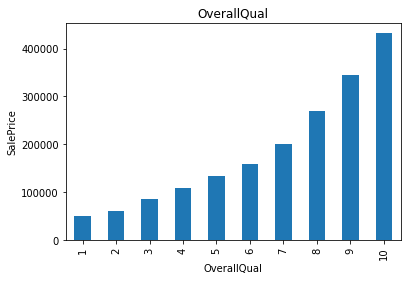

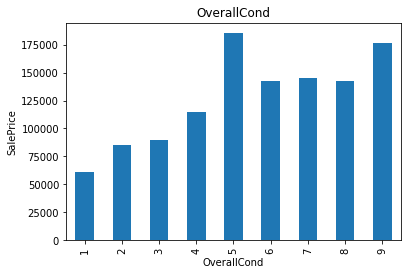

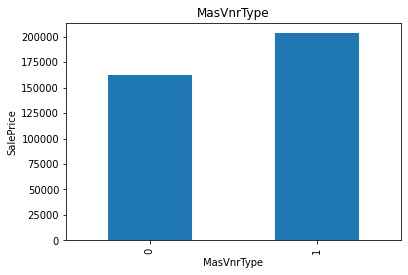

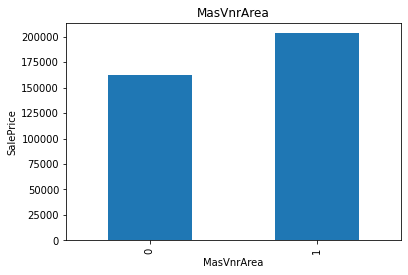

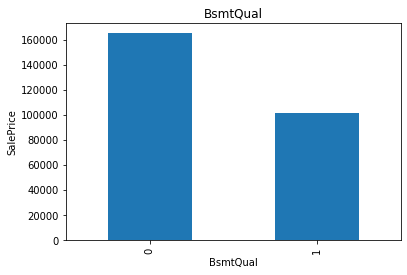

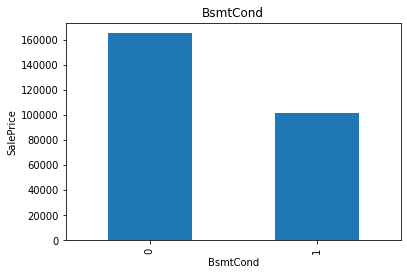

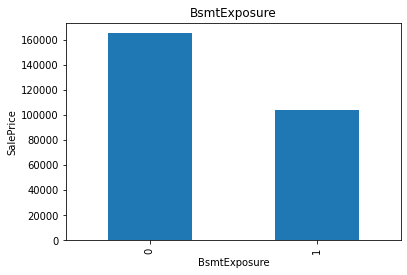

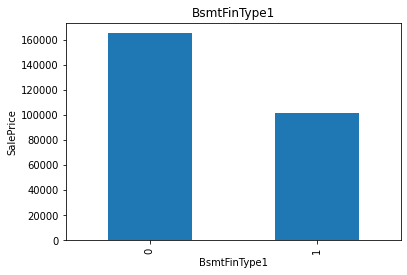

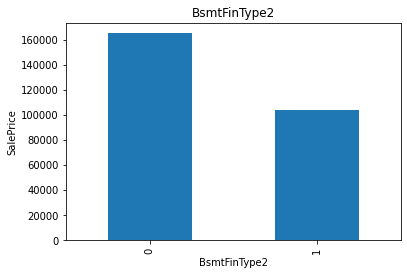

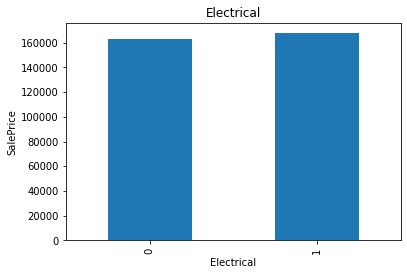

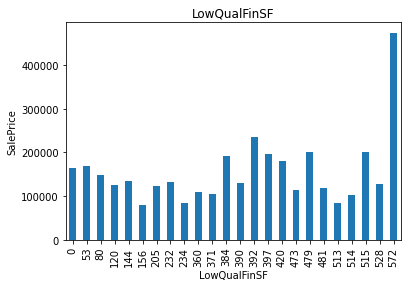

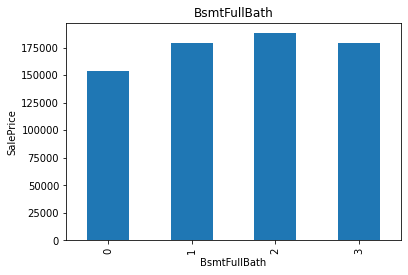

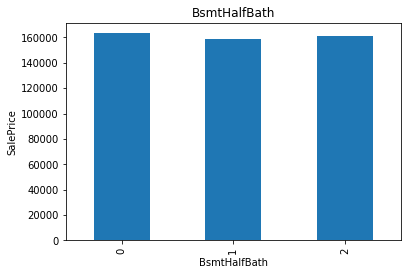

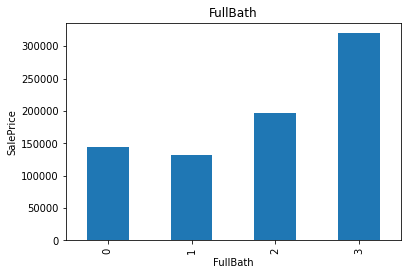

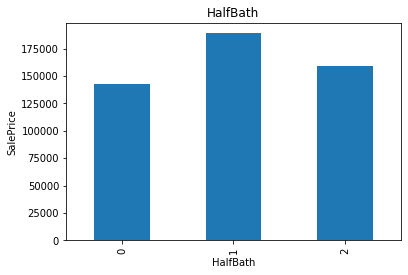

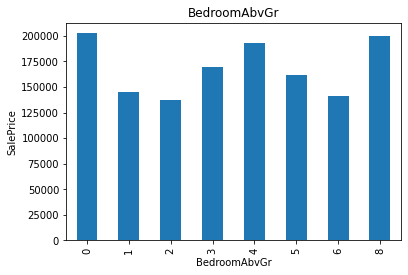

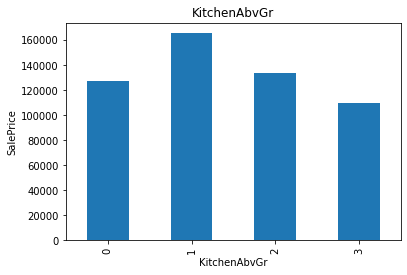

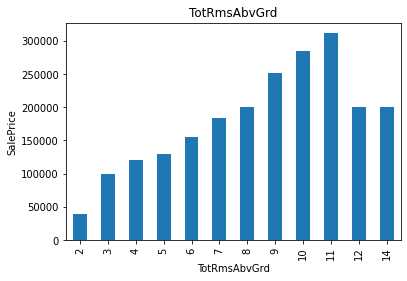

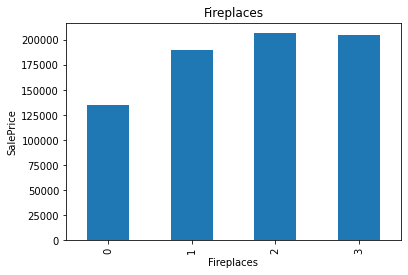

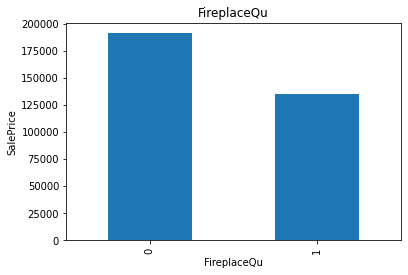

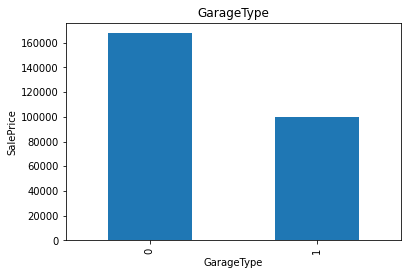

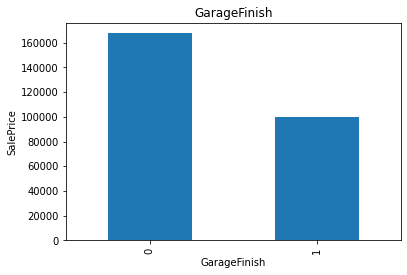

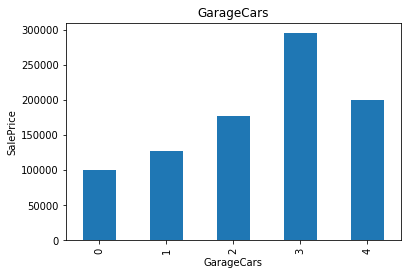

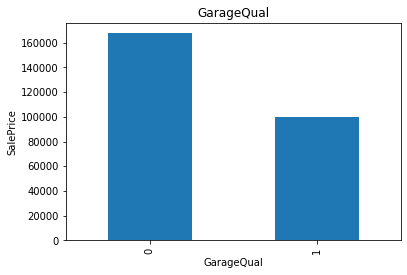

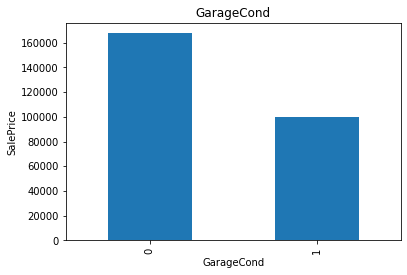

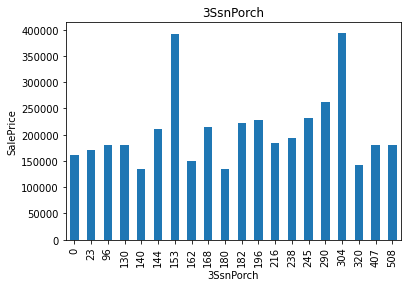

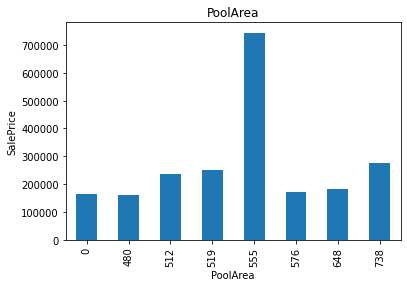

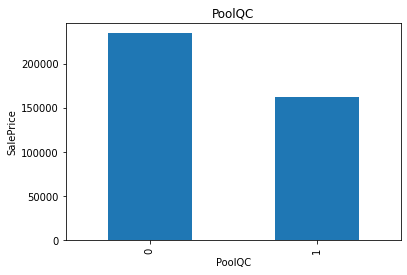

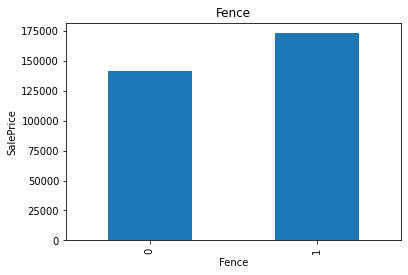

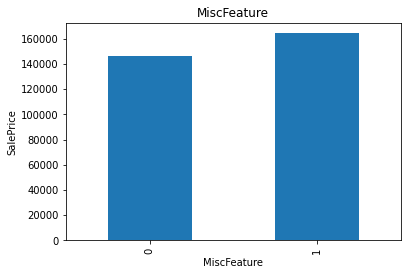

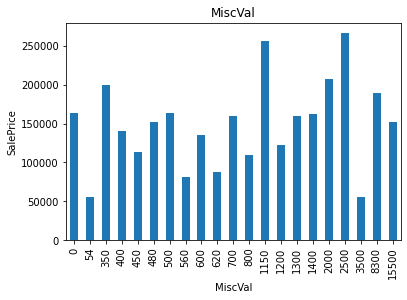

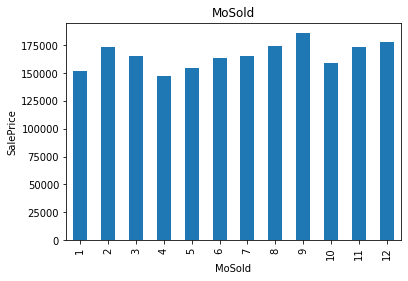

In [21]:
for feature in discrete_feature:
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [22]:
## There is a relationship between variable number and SalePrice

## continuous_feature

In [23]:
continuous_feature=[feature for feature in Numerical_variable if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


In [24]:
continuous_feature

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

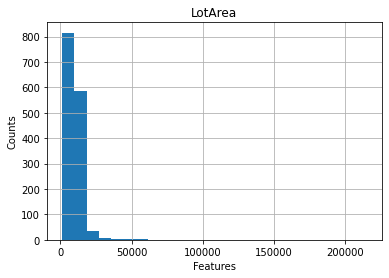

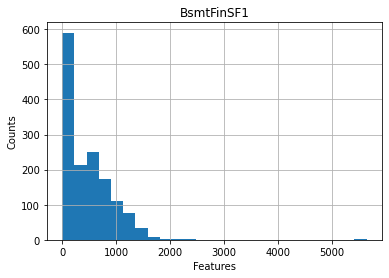

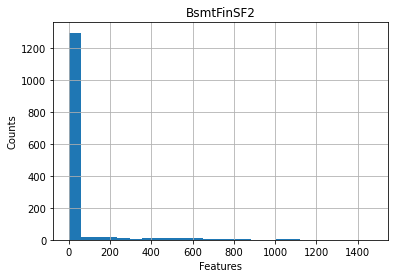

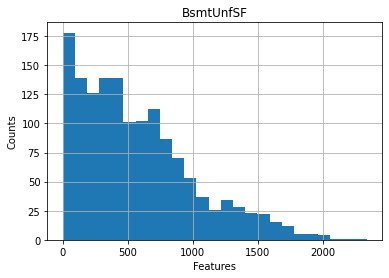

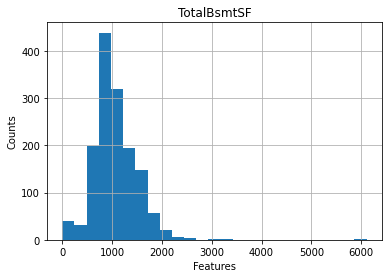

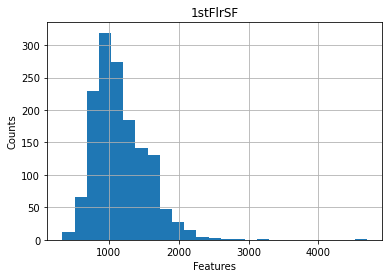

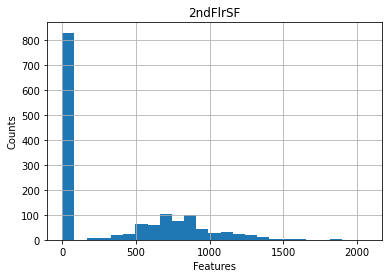

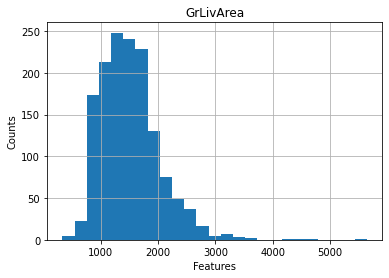

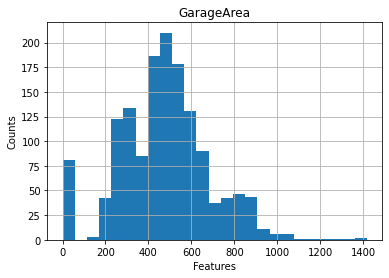

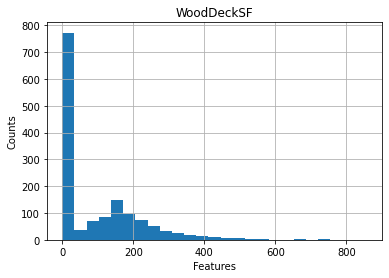

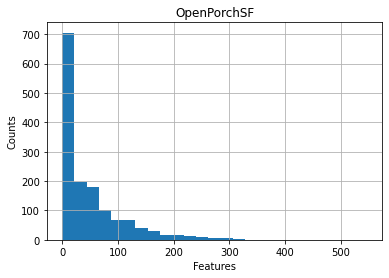

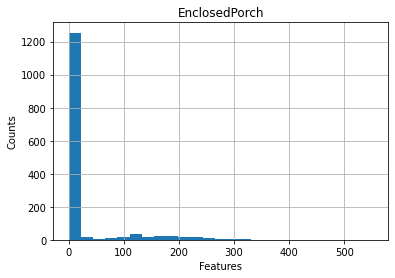

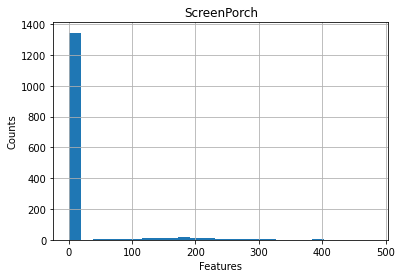

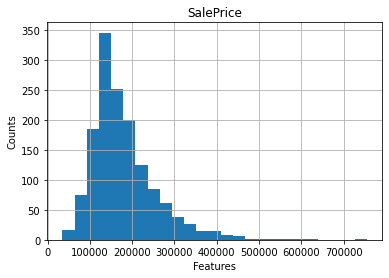

In [25]:
for feature in continuous_feature:
    data[feature].hist(bins=25)
    plt.xlabel("Features")
    plt.ylabel("Counts")
    plt.title(feature)
    plt.show()

In [26]:
# Observation : Most of The continous data are diffrent distrubution 

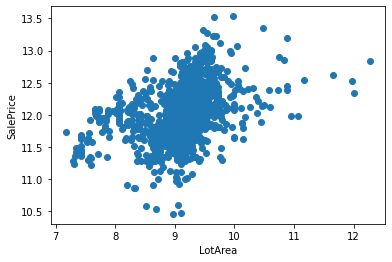

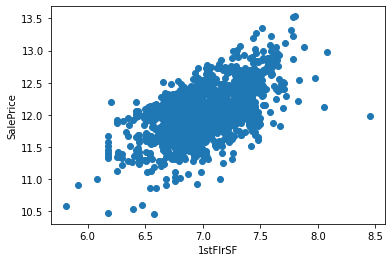

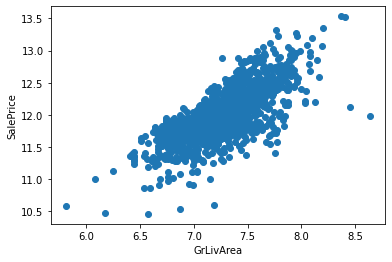

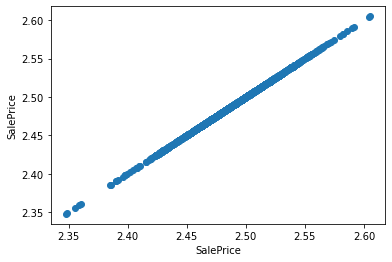

In [27]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df["SalePrice"]=np.log(df["SalePrice"])
        plt.scatter(df[feature],df["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Outliers 

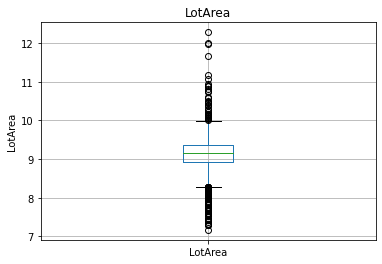

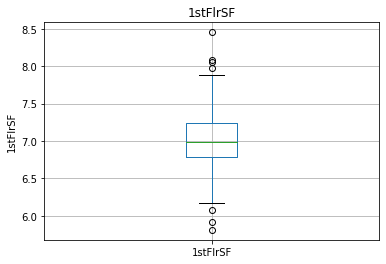

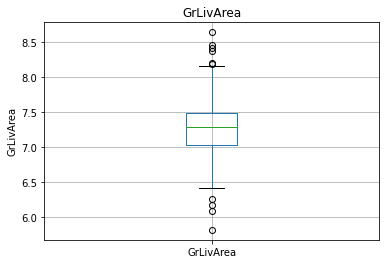

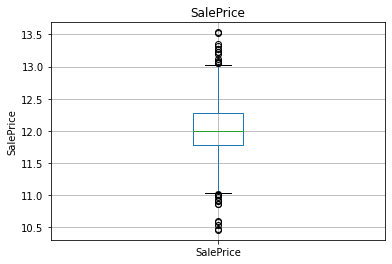

In [28]:
for feature in continuous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Variable

In [29]:
catergorical=[feature for feature in data.columns if data[feature].dtypes=="object"]

In [30]:
len(catergorical)

27

In [31]:
data[catergorical]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [32]:
for feature in catergorical:
    print("The feature is {} and number of catergorical are {}".format(feature,len(data[feature].unique())))

The feature is MSZoning and number of catergorical are 5
The feature is Street and number of catergorical are 2
The feature is LotShape and number of catergorical are 4
The feature is LandContour and number of catergorical are 4
The feature is Utilities and number of catergorical are 2
The feature is LotConfig and number of catergorical are 5
The feature is LandSlope and number of catergorical are 3
The feature is Neighborhood and number of catergorical are 25
The feature is Condition1 and number of catergorical are 9
The feature is Condition2 and number of catergorical are 8
The feature is BldgType and number of catergorical are 5
The feature is HouseStyle and number of catergorical are 8
The feature is RoofStyle and number of catergorical are 6
The feature is RoofMatl and number of catergorical are 8
The feature is Exterior1st and number of catergorical are 15
The feature is Exterior2nd and number of catergorical are 16
The feature is ExterQual and number of catergorical are 4
The fe

####  Obervation: columns like Neighborhood,Exterior1st,Exterior2nd etc has more unique values so we will use diffrent method to handle this 

In [33]:
## we are Finding out the relationship between categorical variable and dependent feature SalesPrice

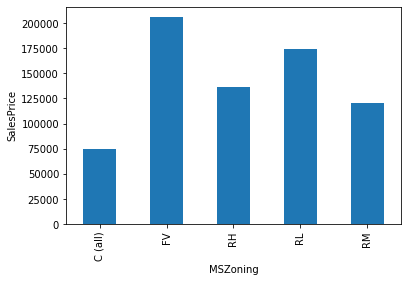

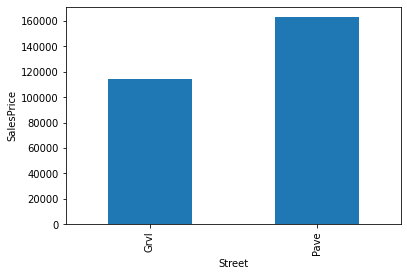

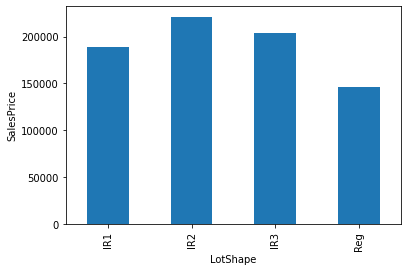

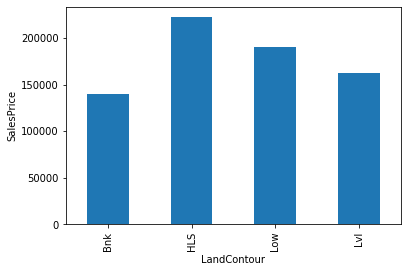

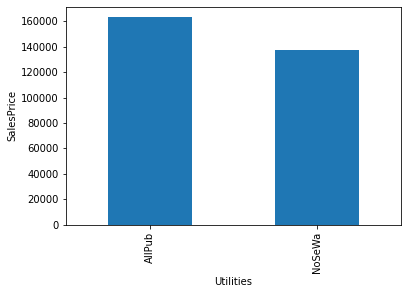

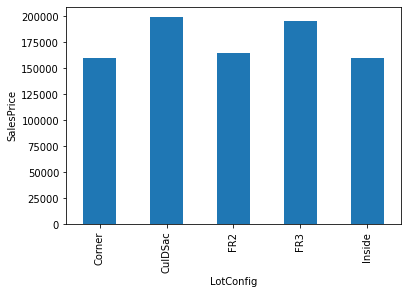

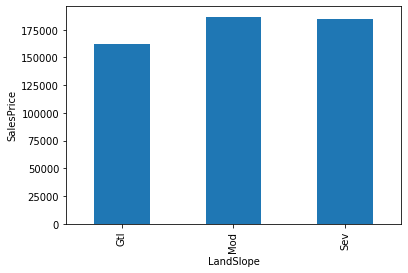

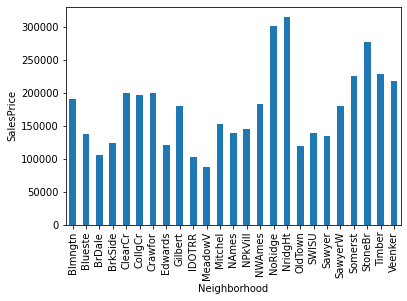

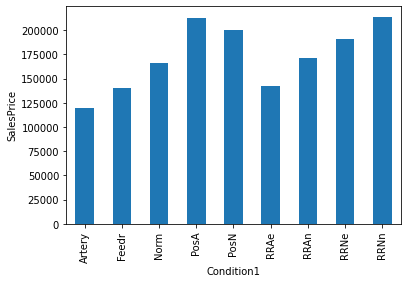

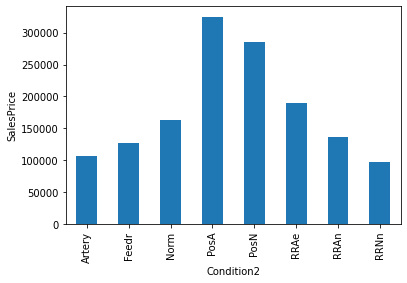

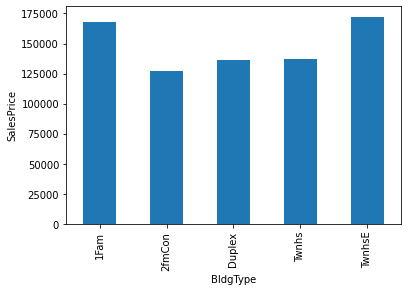

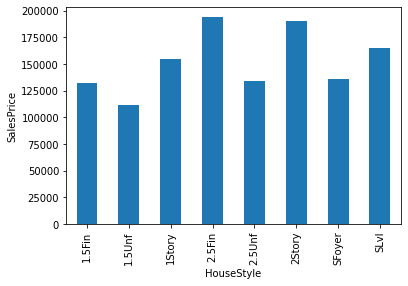

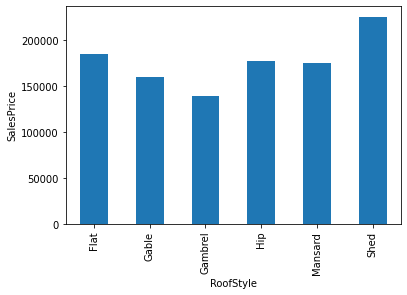

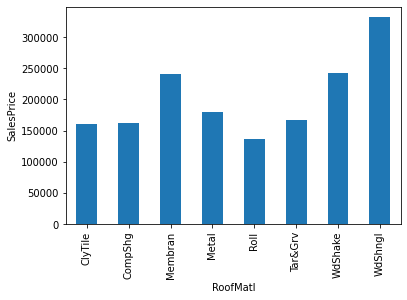

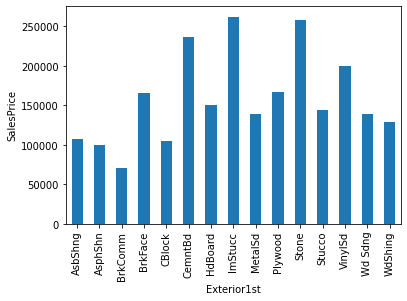

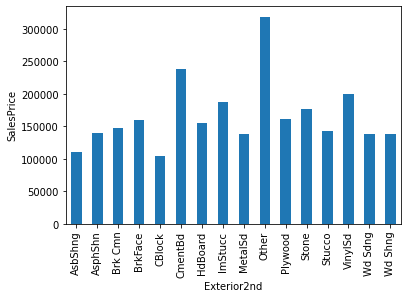

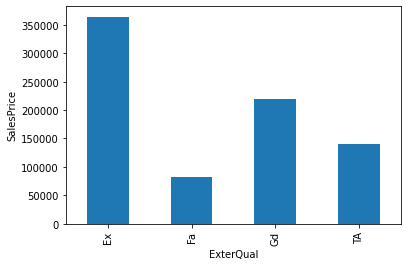

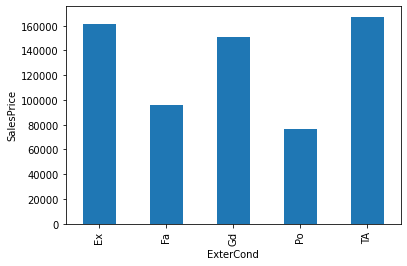

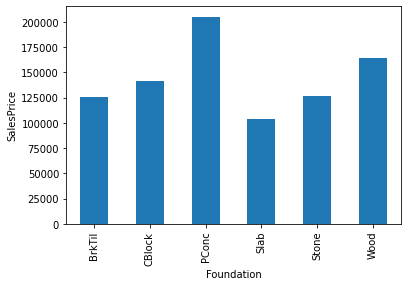

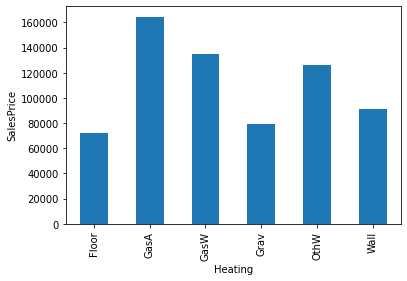

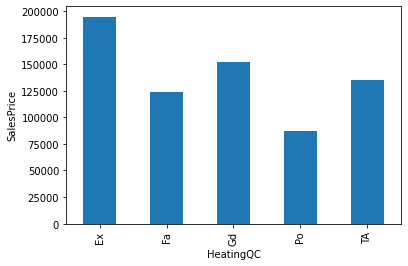

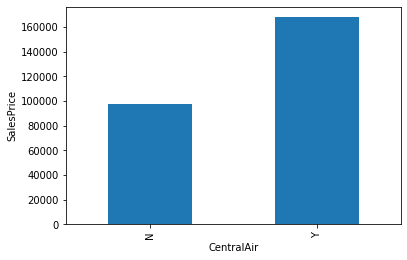

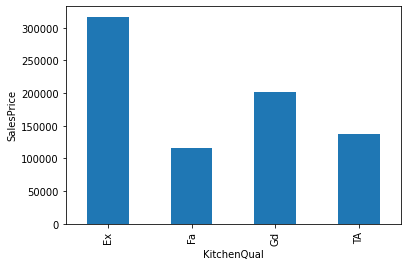

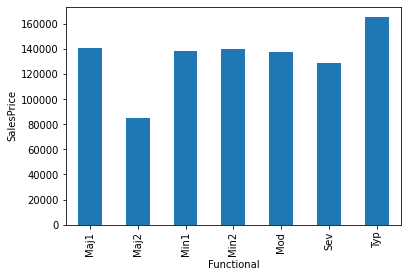

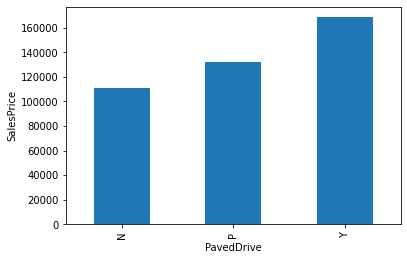

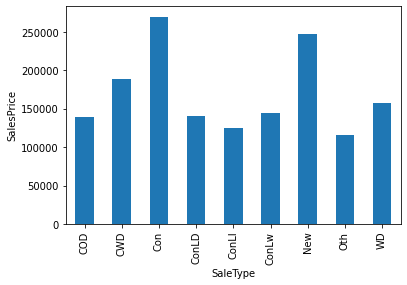

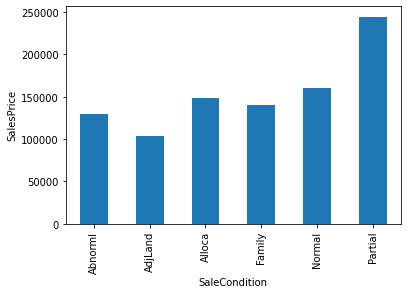

In [34]:
for feature in catergorical:
    df=data.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.ylabel("SalesPrice")
    plt.xlabel(feature)
    plt.show()
    